In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from scipy.stats import iqr
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Populating the interactive namespace from numpy and matplotlib


C:\Users\Dimas AR\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test', 'cm', 'f', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [30]:
import lightgbm as lgb 
import xgboost as xgb 

In [31]:
train = pd.read_csv(r"D:\Richter Prediction Modelling Earthquake Damage\train_values.csv")
labels = pd.read_csv(r"D:\Richter Prediction Modelling Earthquake Damage\train_labels.csv")
test = pd.read_csv(r"D:\Richter Prediction Modelling Earthquake Damage\test_values.csv")
print("We have "+str(train.shape[0])+" set of Training data and "+str(test.shape[0])+" set of testing data "+"Totally we Have "+str(train.shape[0]+test.shape[0])+" Dataset...")

We have 260601 set of Training data and 86868 set of testing data Totally we Have 347469 Dataset...


In [32]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [33]:
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [34]:
train = pd.merge(train,labels)
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [35]:
train.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,...,0,0,0,0,0,0,0,0,0,3


In [36]:
train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [37]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Grade1 :25124->9.64079186188848%
Grade2 :148259->56.89118614280068%
Grade3 :87218->33.468021995310835%


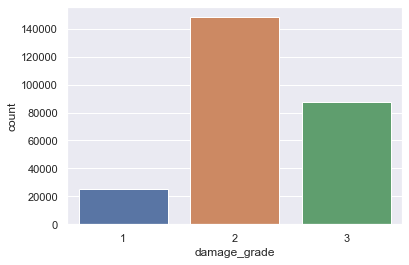

In [39]:
sns.countplot(train.damage_grade)
print('Grade1 :'+str(sum(train.damage_grade == 1))+'->'+str(sum(train.damage_grade == 1)/train.shape[0]*100)+'%')
print('Grade2 :'+str(sum(train.damage_grade == 2))+'->'+str(sum(train.damage_grade == 2)/train.shape[0]*100)+'%')
print('Grade3 :'+str(sum(train.damage_grade == 3))+'->'+str(sum(train.damage_grade == 3)/train.shape[0]*100)+'%')

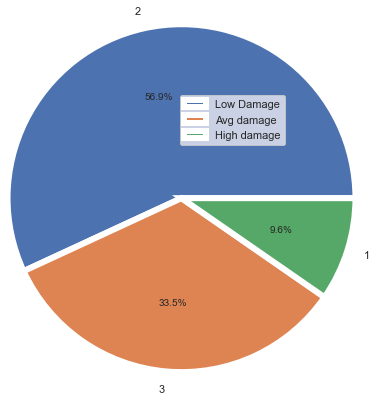

In [40]:
train["damage_grade"].dropna().astype(int).value_counts().plot.pie(autopct="%.1f%%", 
                                                    shadow=False,rotatelabels=False,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=2
                                                    )
plt.legend(["Low Damage","Avg damage","High damage"])
plt.show()

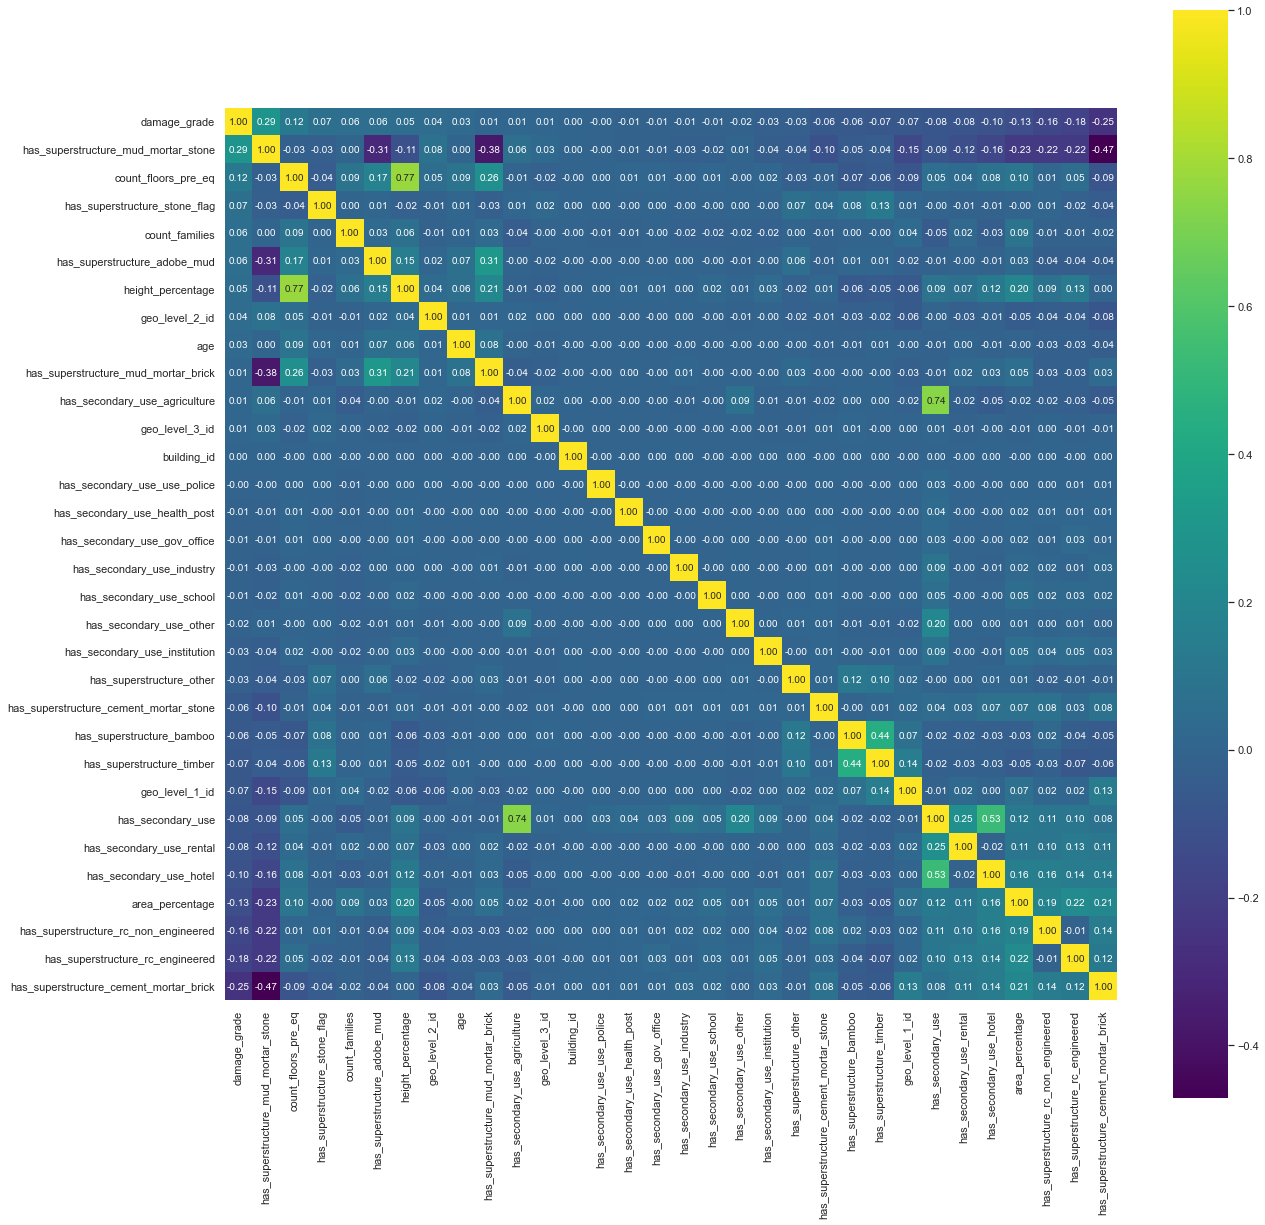

In [41]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20,20))
k = 40
cols = corrmat.nlargest(k, 'damage_grade')['damage_grade'].index #cols for correlations
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cmap="viridis", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Berdasarkan correlation map diatas, dapat diambil beberapa kategori yang memberikan pengaruh terhadap tingkat kerusakan, antara lain :**

**1. Berdasarkan Material Bangunan :**
    - has_superstructure_mud_mortar_stone = Campuran mud mortar dan stone
    - has_superstructure_stone_flag = stone
    - has_superstructure_adobe_mud = adobe mud (Bata dari lumpur)
    - has_superstructure_mud_mortar_brick = Campuran mud mortar dan batu bata
    - has_superstructure_rc_engineered = beton reinforced
    - has_superstructure_cement_mortar_brick = Campuran semen mortar dan bata
   
   
**2. Berdasarkan Karakteristik Bangunan :**
    - count_floors_pre_eq = Jumlah lantai
    - height_percentage = Tinggi bangunan
    - age = Usia Bangunan
    - area_percentage = Luas area

# --------------------------------------------------------------------------------------------------------

# Berdasarkan Material Bangunan
- has_superstructure_mud_mortar_stone = Campuran mud mortar dan stone
- has_superstructure_stone_flag = stone
- has_superstructure_adobe_mud = adobe mud (Bata dari lumpur)
- has_superstructure_mud_mortar_brick = Campuran mud mortar dan batu bata
- has_superstructure_rc_engineered = beton reinforced
- has_superstructure_cement_mortar_brick = Campuran semen mortar dan bata

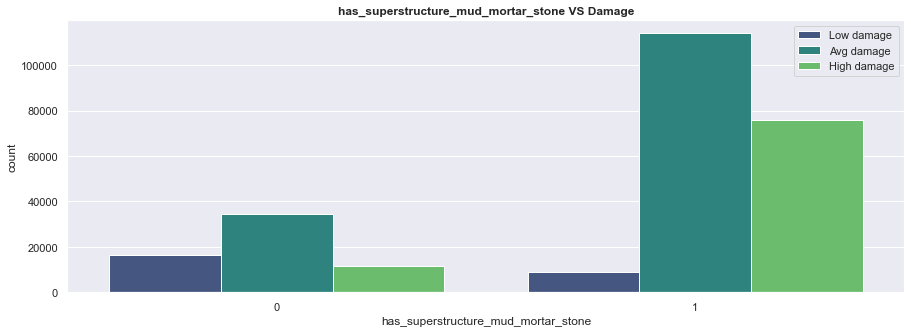

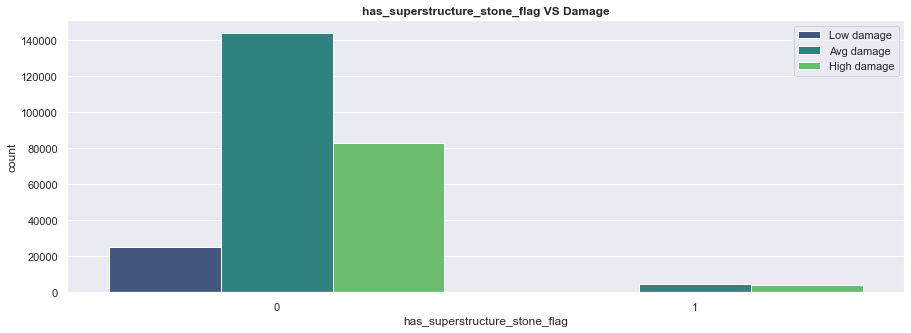

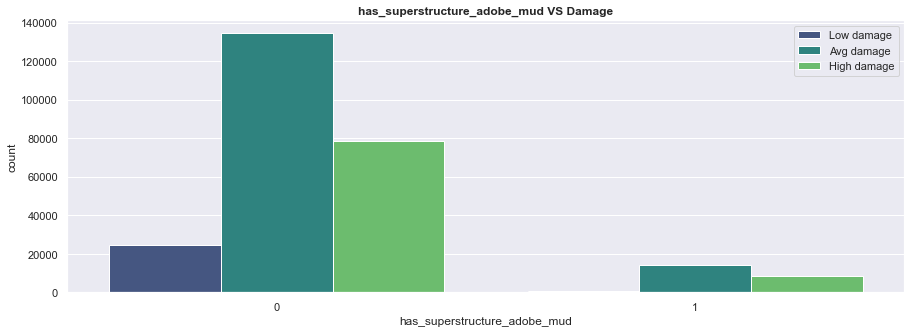

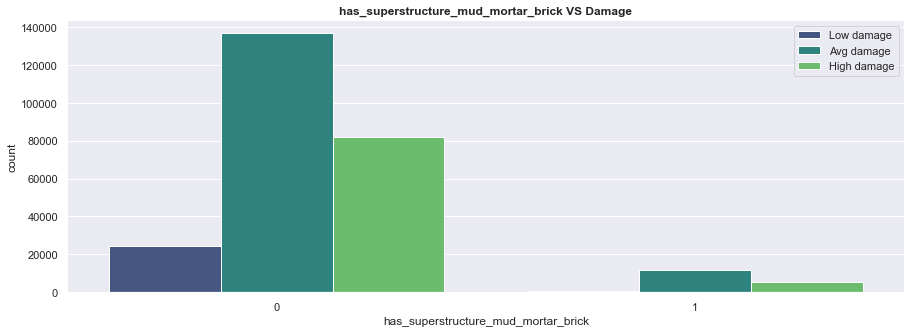

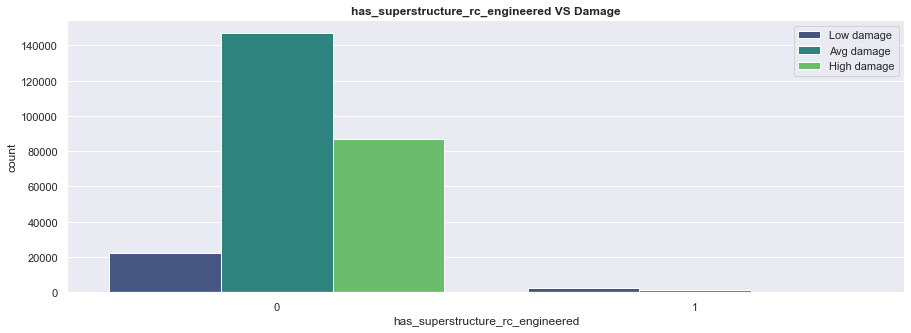

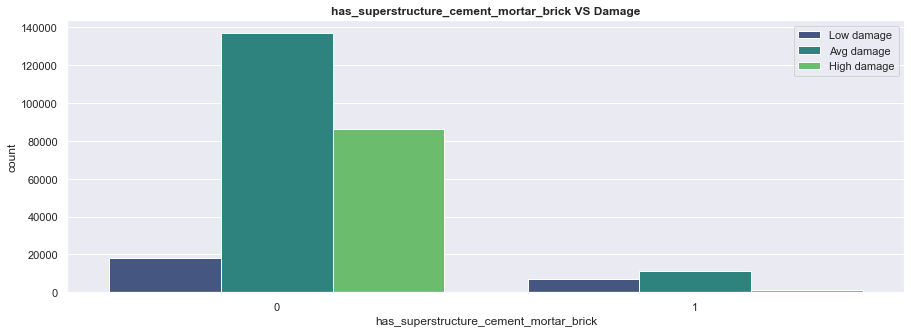

In [42]:
binary_cols=["has_superstructure_mud_mortar_stone","has_superstructure_stone_flag",
             "has_superstructure_adobe_mud","has_superstructure_mud_mortar_brick",
             "has_superstructure_rc_engineered","has_superstructure_cement_mortar_brick"]

for col in binary_cols:
    plt.figure(figsize=(15,5))
    plt.subplot(1,1,1)
    sns.countplot(train[col],hue=train.damage_grade,palette="viridis")
    plt.title(col+ " VS Damage",fontweight="bold")
    plt.legend(["Low damage","Avg damage","High damage"]) 
    plt.show()

**Kesimpulan : Bangunan yang menggunakan beton reinforce memiliki tingkat kerusakan yang paling rendah dan diikuti oleh bangunan dengan campuran semen-mortar-batubata**

# Berdasarkan Karakteristik Bangunan
- count_floors_pre_eq = Jumlah lantai
- height_percentage = Tinggi bangunan
- age = Usia Bangunan
- area_percentage = Luas area

2.1297232167182782
2.0


C:\Users\Dimas AR\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

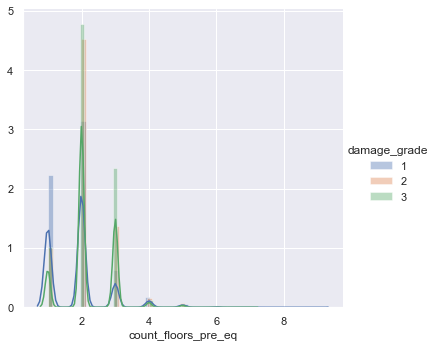

In [43]:
print(train.count_floors_pre_eq.mean())
print(train.count_floors_pre_eq.median())
plt.figure(figsize=(10,5))
sns.FacetGrid(train,hue='damage_grade',height=5)\
    .map(sns.distplot,'count_floors_pre_eq')\
    .add_legend()
plt.show()

5.43436517895173
5.0


<Figure size 720x360 with 0 Axes>

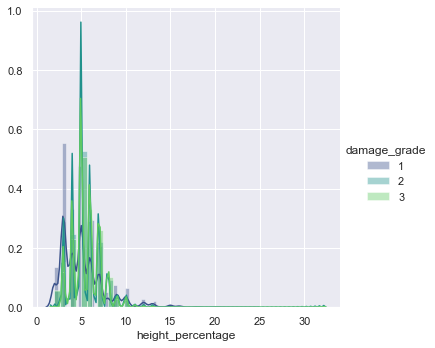

In [44]:
print(train.height_percentage.mean())
print(train.height_percentage.median())
plt.figure(figsize=(10,5))
sns.FacetGrid(train,hue='damage_grade',height=5,palette="viridis")\
    .map(sns.distplot,'height_percentage')\
    .add_legend()
plt.show()

8.018050583075276
7.0


<Figure size 720x648 with 0 Axes>

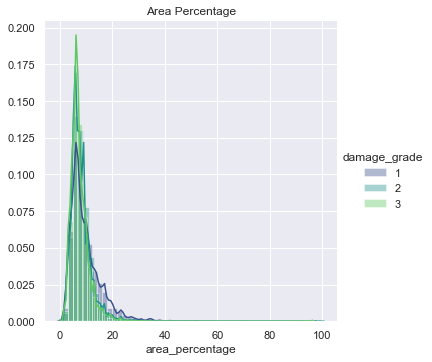

In [45]:
print(train.area_percentage.mean())
print(train.area_percentage.median())
plt.figure(figsize=(10,9))
sns.FacetGrid(train,hue='damage_grade',height=5,palette="viridis")\
    .map(sns.distplot,'area_percentage')\
    .add_legend()
plt.title("Area Percentage")
plt.show()

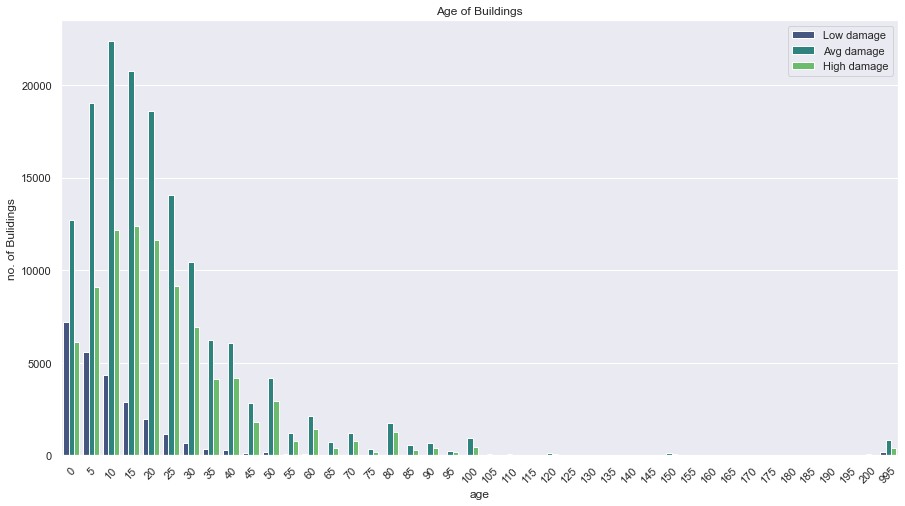

In [46]:
plt.figure(figsize=(15,8))
sns.countplot(x=train["age"],hue=train["damage_grade"],palette="viridis")
plt.ylabel("no. of Bulidings")
plt.title("Age of Buildings")
plt.legend(["Low damage","Avg damage","High damage"],loc="upper right")
plt.xticks(rotation=45)
plt.show()

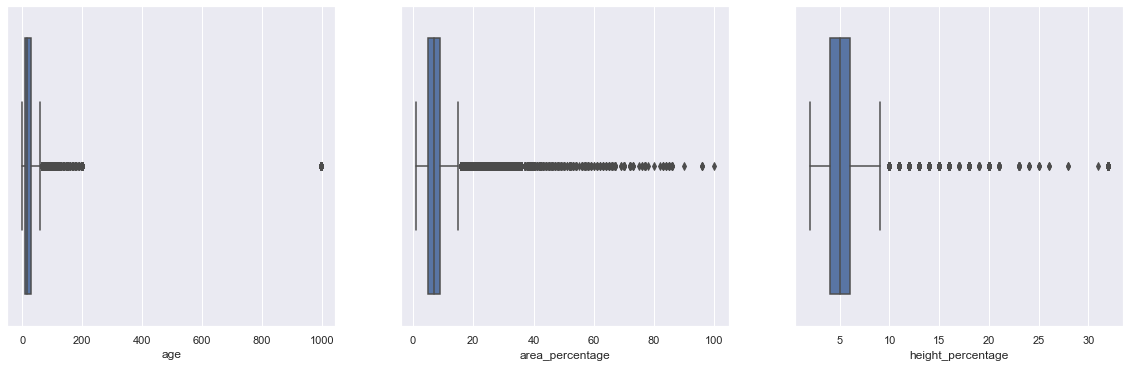

In [47]:
boxplot_cols=["age", "area_percentage", "height_percentage"]
q=1
plt.figure(figsize=(20,20))
for j in boxplot_cols:
    plt.subplot(3,3,q)
    ax=sns.boxplot(train[j].dropna())
    plt.xlabel(j)
    q+=1
plt.show()

**Kesimpulan (Karakteristik bangunan dengan kerusakan paling banyak) :**
1. Bangunan yang memiliki 2 lantai lalu 1 lantai kemudian 3 lantai
2. Bangunan yang memiliki persentase tinggi 5,4%
3. Bangunan yang memiliki persentase area 8%
4. Bangunan yang berusia antara 0-50 tahun

## Hubungan Material vs Karakteristik terhadap Tingkat Kerusakan

### RC - Cement Mortar Brick - Mud Mortar Stone vs Count Floors

C:\Users\Dimas AR\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


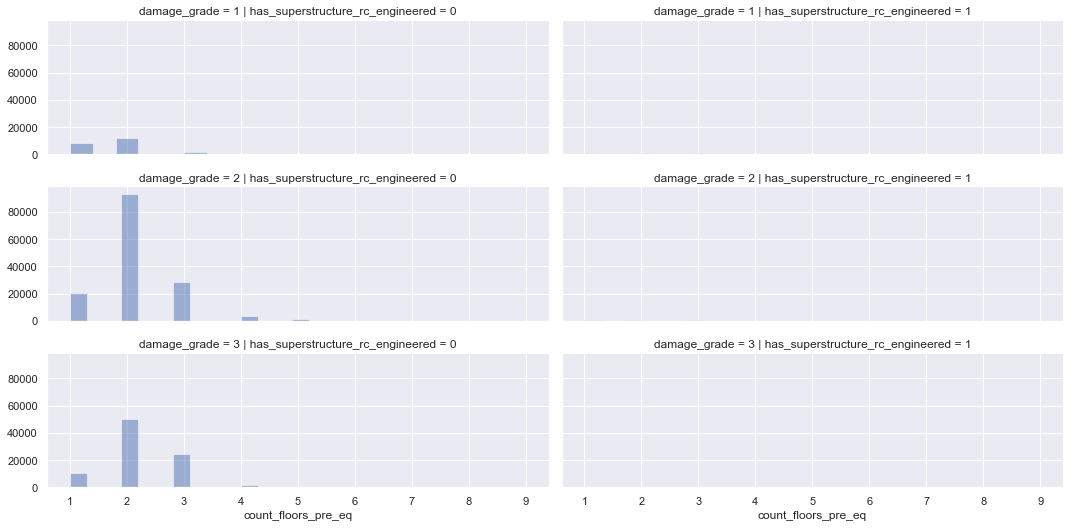

In [48]:
grid = sns.FacetGrid(train, col='has_superstructure_rc_engineered', row='damage_grade', size=2.5, aspect=3)
grid.map(plt.hist, 'count_floors_pre_eq', alpha=.5, bins=20)
grid.add_legend()

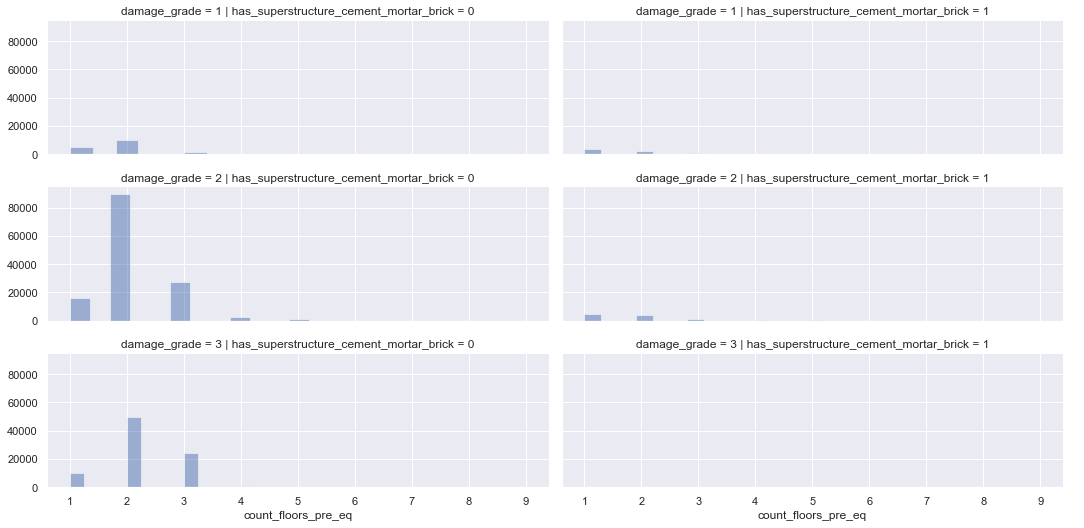

In [49]:
grid = sns.FacetGrid(train, col='has_superstructure_cement_mortar_brick', row='damage_grade', size=2.5, aspect=3)
grid.map(plt.hist, 'count_floors_pre_eq', alpha=.5, bins=20)
grid.add_legend()

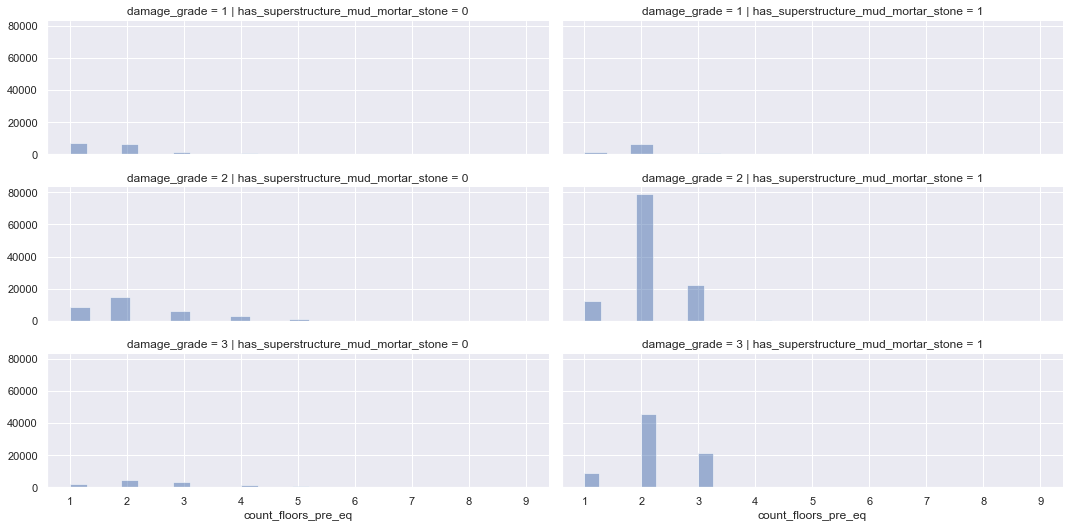

In [50]:
grid = sns.FacetGrid(train, col='has_superstructure_mud_mortar_stone', row='damage_grade', size=2.5, aspect=3)
grid.map(plt.hist, 'count_floors_pre_eq', alpha=.5, bins=20)
grid.add_legend()

### RC - Cement Mortar Brick - Mud Mortar Stone vs Tinggi Bangunan
Kayaknya ini tinggi bangunan gua anggep Meter aja

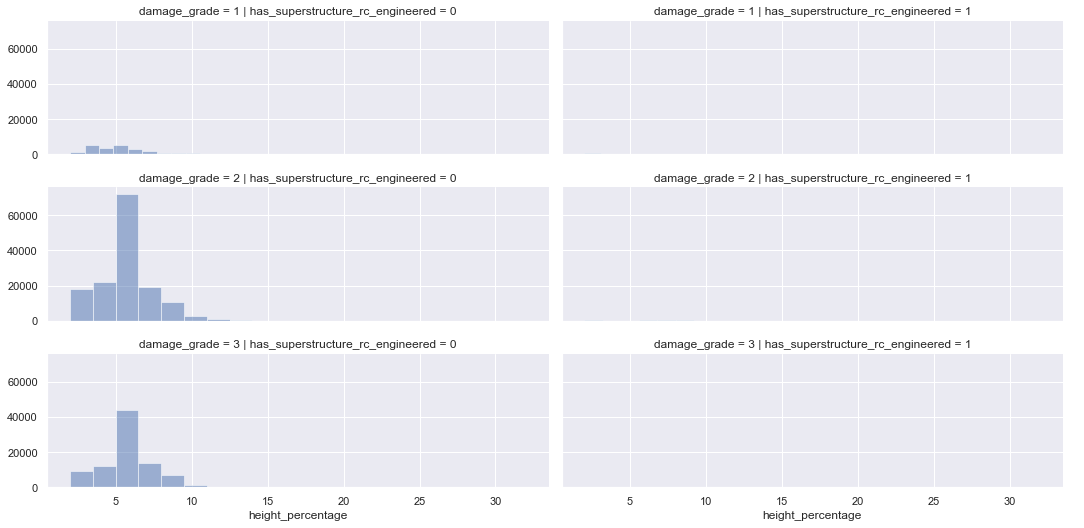

In [51]:
grid = sns.FacetGrid(train, col='has_superstructure_rc_engineered', row='damage_grade', size=2.5, aspect=3)
grid.map(plt.hist, 'height_percentage', alpha=.5, bins=20)
grid.add_legend()

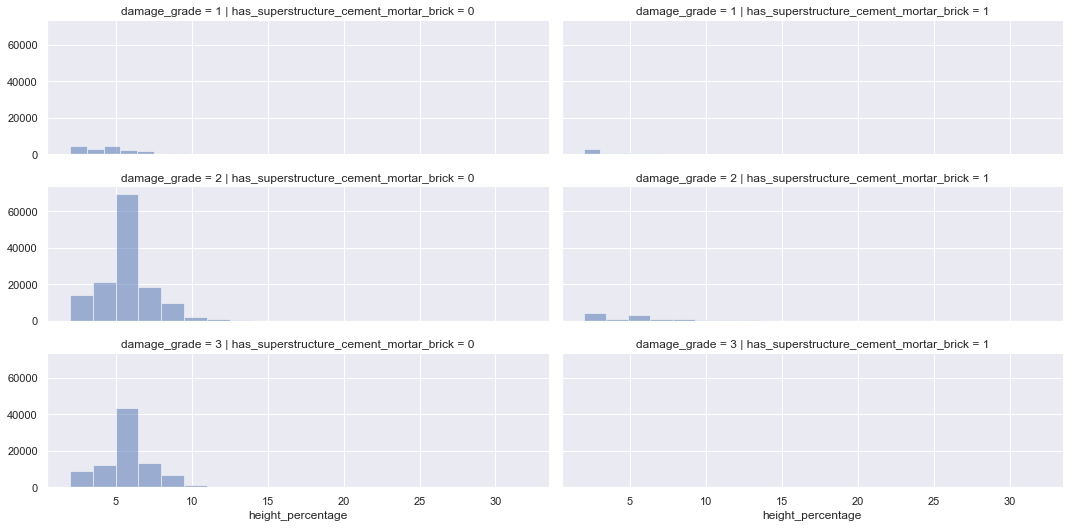

In [52]:
grid = sns.FacetGrid(train, col='has_superstructure_cement_mortar_brick', row='damage_grade', size=2.5, aspect=3)
grid.map(plt.hist, 'height_percentage', alpha=.5, bins=20)
grid.add_legend()

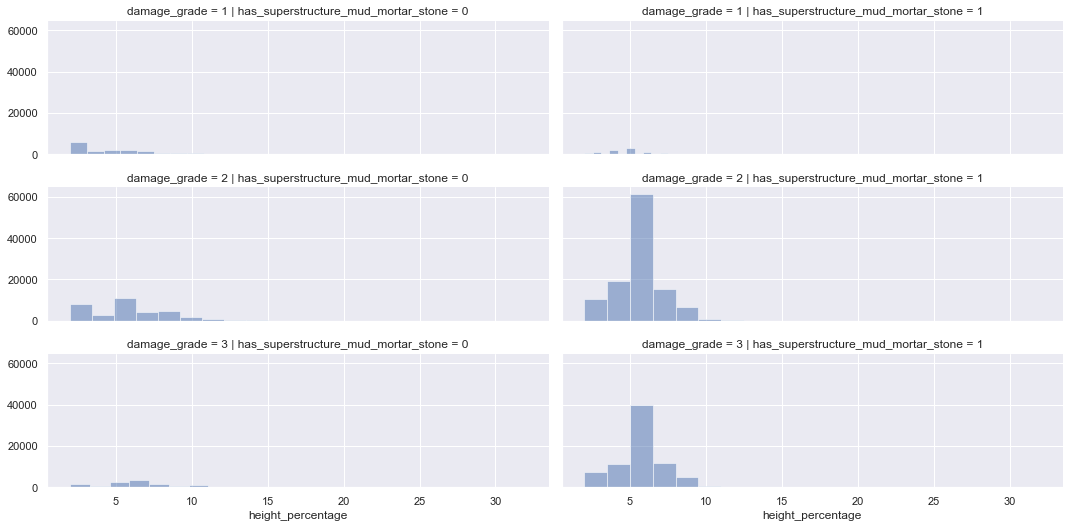

In [53]:
grid = sns.FacetGrid(train, col='has_superstructure_mud_mortar_stone', row='damage_grade', size=2.5, aspect=3)
grid.map(plt.hist, 'height_percentage', alpha=.5, bins=20)
grid.add_legend()

## RC - Cement Mortar Brick - Mud Mortar Stone vs Luas Area

Ini gua anggep luas areanya meter persegi

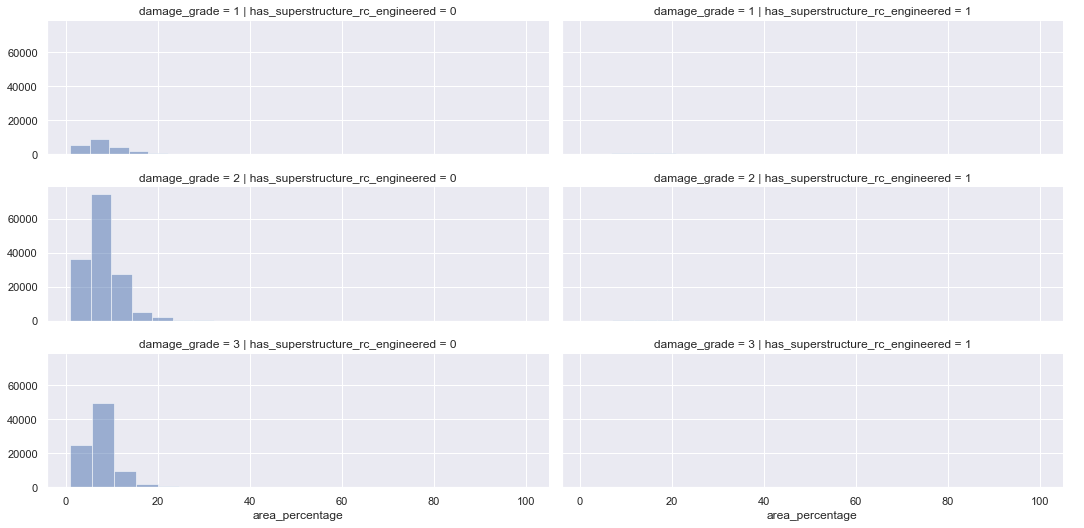

In [54]:
grid = sns.FacetGrid(train, col='has_superstructure_rc_engineered', row='damage_grade', size=2.5, aspect=3)
grid.map(plt.hist, 'area_percentage', alpha=.5, bins=20)
grid.add_legend()

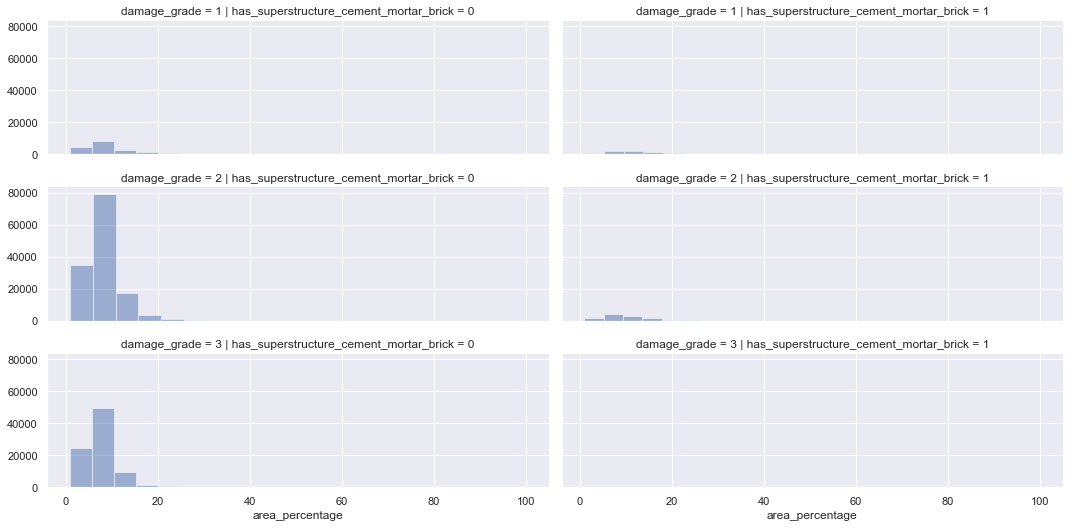

In [55]:
grid = sns.FacetGrid(train, col='has_superstructure_cement_mortar_brick', row='damage_grade', size=2.5, aspect=3)
grid.map(plt.hist, 'area_percentage', alpha=.5, bins=20)
grid.add_legend()

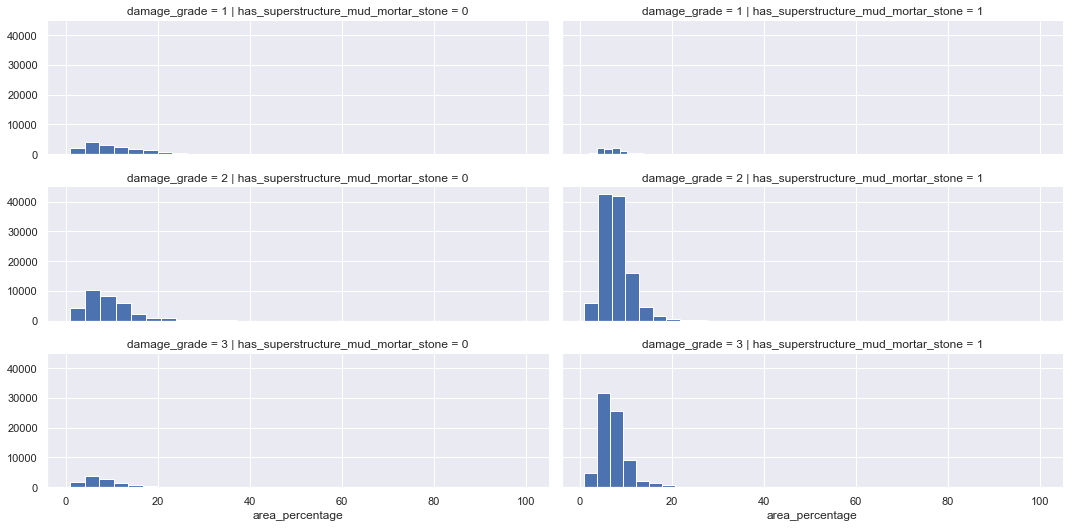

In [56]:
grid = sns.FacetGrid(train, col='has_superstructure_mud_mortar_stone', row='damage_grade', size=2.5, aspect=3)
grid.map(plt.hist, 'area_percentage', alpha=1, bins=30)
grid.add_legend()

# Kesimpulan :

**Rekomendasi bangunan (asumsi rumah)** yang dapat **meminimalisasi kerusakan akibat gempa** adalah bangunan dengan **bahan Reinforce Concrete atau Cement-Mortar-Brick** dengan **jumlah lantai sebesar 1 atau 3 (tidak boleh 2)**, lalu **tinggi < 5 m dan > 7 m** dan **luas area > 10 meter persegi**

## ----------------------------------------------------------------------------------------------------------------------------